# Implementation exercise: KNN

In [1]:
import random
import numpy as np
import operator
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline  

## Load dataset
The iris data set (https://en.wikipedia.org/wiki/Iris_flower_data_set) it loaded by the function loadDataset.

Arguments:

* *split*: int Split rate between test and training set e.g. 0.67 corresponds to 1/3 test and 2/3 validation

Returns:

* *X*: list(array of length 4); Trainig data
* *Z*: list(int); Training labels
* *XT*: list(array of length 4); Test data
* *ZT*: list(int); Test labels

In [2]:
def loadDataset(split, X=[] , XT=[], Z = [], ZT = []):
    dataset = datasets.load_iris()
    c = list(zip(dataset['data'], dataset['target']))
    random.seed(224)
    random.shuffle(c)
    x, t = zip(*c)
    sp = int(split*len(c))
    X = x[:sp]
    XT = x[sp:]
    Z = t[:sp]
    ZT = t[sp:]
    return X, XT, Z, ZT

In [3]:
# prepare data
split = 0.67
X, XT, Z, ZT = loadDataset(split)

## Plot dataset
Since *X* is dimentionality 4, 16 scatterplots (4x4) are plotted showing the dependencies of each two features.

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


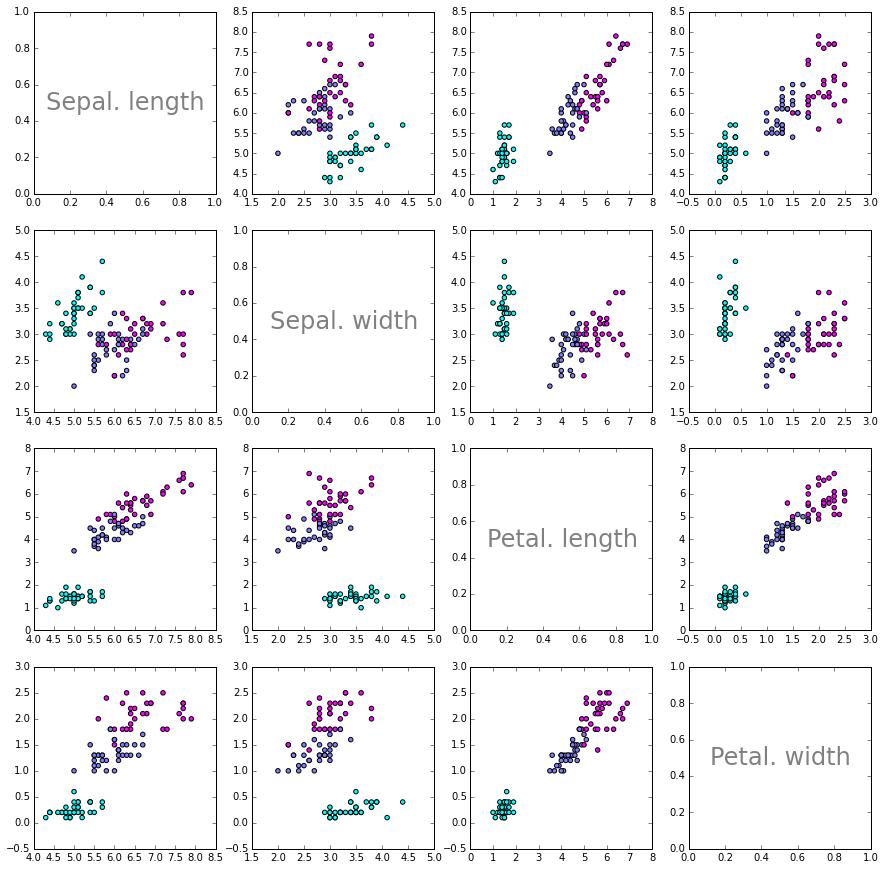

In [4]:
Xa = np.asarray(X)
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(Xa[:,j],Xa[:,i], c = Z, cmap=plt.cm.cool)

## Exercise 1: Euclidean distance
Compute euclidean distance between two data points.

arguments:
* *x1*: array of length 4; data point
* *x2*: array of length 4; data point

returns:
* *distance*:int; euclidean distance between *x1* and *x2* 

In [83]:
def euclideanDistance(x1, x2):
    return np.sqrt(sum([(v1 - v2)**2 for (v1, v2) in zip(x1, x2)]))

## Exercise 2: get k nearest neighbors
For one data point xt compute all k nearest neighbors.

arguments:
* *X*: list(array of length 4); Trainig data
* *Z*: list(int); Training labels
* *xt*: array of length 4; Test data point

returns:
* neighbors: list of length *k* of tuples (X_neighbor, Z_neighbor, distance between neighbor and xt); **this is the list of k nearest neighbors to xt**

In [84]:
def getNeighbors(X, Z, xt, k):
    return sorted(
            [(x, Z[i], euclideanDistance(x, xt)) for (i, x) in enumerate(X)],
            key=lambda ptd: ptd[2]
        )[:k]

## Exercise 3: get neighbor response
For the previously computed k nearest neighbors compute the actual response. I.e. give back the class of the majority of nearest neighbors. What do you do with a tie?

arguments:
* neighbors

returns
* y: int; majority target

In [85]:
from collections import defaultdict
def getResponse(neighbors):
    # We first group the neighbours by label and track their distances
    label_dists = defaultdict(list)
    for neigh in neighbors:
        label_dists[neigh[1]].append(neigh[2])
    # now we sort the labels by how frequently they occur
    freqs = sorted(label_dists.items(), key=lambda x: -len(x[1]))
    # next, check the most frequent label, and create a list of all labels that have the same frequency
    max_freq = len(freqs[0][1])
    best_labels = [label for label, dists in freqs if len(dists) == max_freq]
    if len(best_labels) == 1:
        # if this is the only label with this max frequency, there is no tie, and we return the label
        return best_labels[0]
    else:
        # otherwise, we try and figure out the most frquent label with the lowest average distance
        average_dists = sorted([(label, sum(label_dists[label])) for label in best_labels], key=lambda item: item[1])
        # return the label with the lowest average distance - if there's still a tie, we don't really care which label we assign
        return average_dists[0][0]

## Exercise 4: Compute accuracy

arguments:
* YT:list(int); predicted targets
* ZT:list(int); actual targets

returns:
* accuracy (percentage of correctly classified test data points)

In [86]:
def getAccuracy(YT, ZT):
    return sum([1.0 if  predicted == actual else 0.0 for predicted, actual in zip(YT, ZT)]) / len(YT)

In [87]:
def predict(X, Z, XT, k):
    Y=[]
    for xt in XT:
        neighbors = getNeighbors(X, Z, xt, k)
        Y.append(getResponse(neighbors))
    return Y

## Testing
Should output an accuracy of 0.95999999999999996%.

In [88]:
# prepare data
split = 0.67
X, XT, Z, ZT = loadDataset(split)
print 'Train set: ' + repr(len(X))
print 'Test set: ' + repr(len(XT))
# generate predictions
k = 3
YT = predict(X, Z, XT, k)
accuracy = getAccuracy(YT, ZT)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 100
Test set: 50
Accuracy: 0.96%
